In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [4]:
x = sp.symbols('x')
print(type(x))
x

<class 'sympy.core.symbol.Symbol'>


x

In [7]:
sigmoid = 1 / (1 + sp.exp(-x))
sigmoid

1/(1 + exp(-x))

In [8]:
sigmoid_derivative = sp.diff(sigmoid, x)
sigmoid_derivative

exp(-x)/(1 + exp(-x))**2

In [10]:
sigmoid_function = sp.lambdify(x, sigmoid, 'numpy')
sigmoid_derivative_function = sp.lambdify(x, sigmoid_derivative, 'numpy')

In [31]:
x0 = 5
y0 = sigmoid_function(x0)
y0d = sigmoid_derivative_function(x0)
print(f'[{x0}, {y0}]')
print(f'[{x0}, {y0d}]')

[5, 0.9933071490757153]
[5, 0.006648056670790156]


In [16]:
x = np.linspace(-10, 10, 400)

In [18]:
y = sigmoid_function(x)

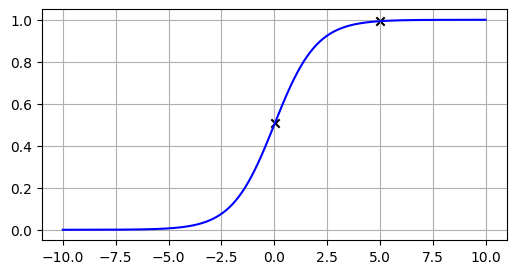

In [32]:
plt.figure(figsize=(6, 3))
plt.plot(x, y, label='Sigmoid', color='blue')
plt.scatter(x[200], y[200], marker='x', c='k')
plt.scatter(x0, y0, marker='x', c='k')
plt.grid(True)
plt.show()

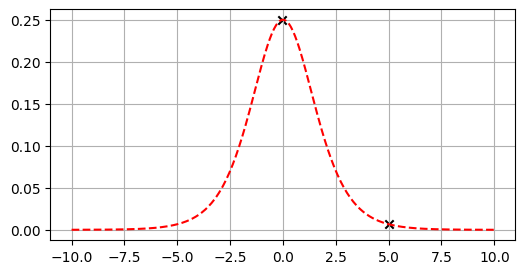

In [33]:
yd = sigmoid_derivative_function(x)
plt.figure(figsize=(6, 3))
plt.plot(x, yd, label='Sigmoid Derivative', color='red', linestyle="--")
plt.scatter(x[199], yd[199], marker='x', c='k')
plt.scatter(x0, y0d, marker='x', c='k')
plt.grid(True)
plt.show()

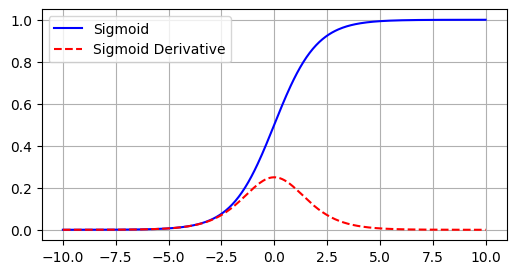

In [34]:
plt.figure(figsize=(6, 3))
plt.plot(x, y, label='Sigmoid', color='blue')
plt.plot(x, yd, label='Sigmoid Derivative', color='red', linestyle="--")
plt.legend()
plt.grid(True)
plt.show()

In [36]:
x = sp.symbols('x')
tanh = sp.tanh(x)
tanh

tanh(x)

In [37]:
tanh_der = sp.diff(tanh, x)
tanh_der

1 - tanh(x)**2

In [39]:
tanh_func = sp.lambdify(x, tanh, 'numpy')
tanh_der_func = sp.lambdify(x, tanh_der, 'numpy')

In [40]:
x_vals = np.linspace(-10, 10, 400)
y_vals = tanh_func(x_vals)
yd_vals = tanh_der_func(x_vals)

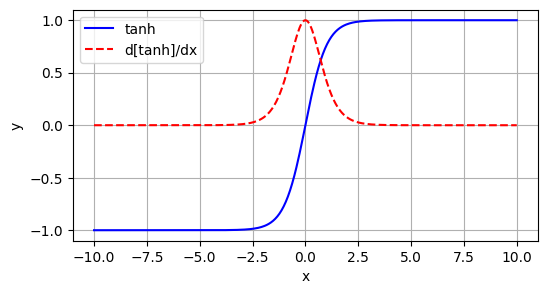

In [41]:
plt.figure(figsize=(6, 3))
plt.plot(x_vals, y_vals, label='tanh', color='blue')
plt.plot(x_vals, yd_vals, label='d[tanh]/dx', color='red', linestyle='--')
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [42]:
relu = sp.Piecewise(
     (0, x < 0),
     (x, x >= 0)
 )
relu

Piecewise((0, x < 0), (x, True))

In [43]:
relu_der = sp.diff(relu, x)
relu_der

Piecewise((0, x < 0), (1, True))

In [44]:
relu_fun = sp.lambdify(x, relu, 'numpy')
relu_der_fun = sp.lambdify(x, relu_der, 'numpy')

In [46]:
y_relu = relu_fun(x_vals)
y_relu_der = relu_der_fun(x_vals)

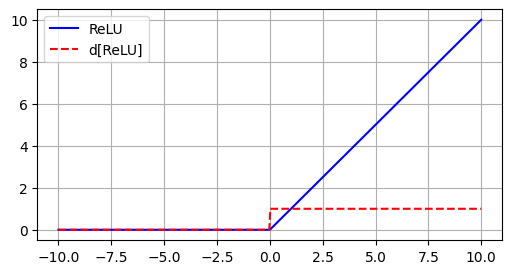

In [47]:
plt.figure(figsize=(6, 3))
plt.plot(x_vals, y_relu, color='blue', label='ReLU')
plt.plot(x_vals, y_relu_der, color='red', linestyle='--', label='d[ReLU]')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
x = sp.symbols('x')

In [9]:
alpha = 0.01
leaky_relu = sp.Piecewise((alpha * x, x < 0),
                         (x, x >= 0))
leaky_relu

Piecewise((0.01*x, x < 0), (x, True))

In [10]:
leaky_relu_derivative = sp.diff(leaky_relu, x)
leaky_relu_derivative

Piecewise((0.01, x < 0), (1, True))

In [11]:
leaky_relu_func = sp.lambdify(x, leaky_relu, 'numpy')
leaky_relu_derivative_func = sp.lambdify(x,
                                         leaky_relu_derivative,
                                         'numpy')

In [12]:
x_lrelu = np.linspace(-10, 10, 400)
y_lrelu = leaky_relu_func(x_lrelu)
y_dlrelu = leaky_relu_derivative_func(x_lrelu)

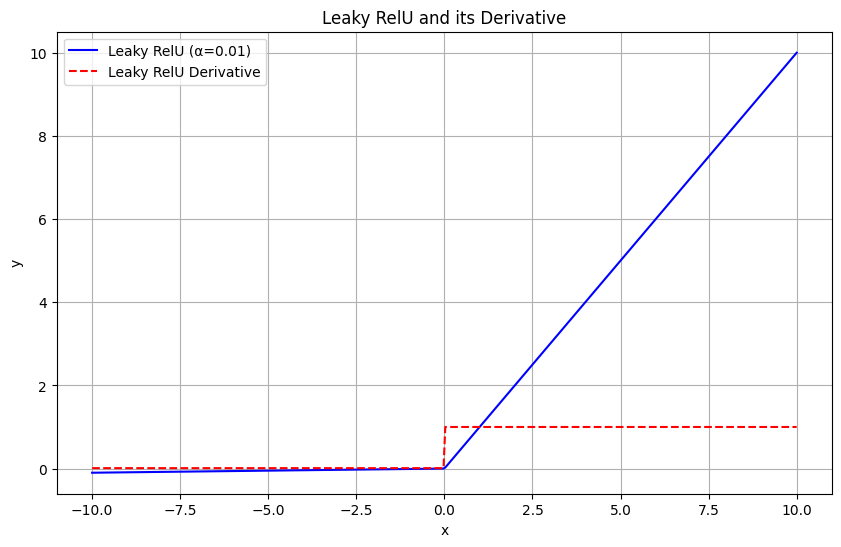

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(x_lrelu, y_lrelu, color='blue',
        label=f'Leaky RelU (α={alpha})')
plt.plot(x_lrelu, y_dlrelu, color='red',
        linestyle='--', label='Leaky RelU Derivative')
plt.title('Leaky RelU and its Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
x = sp.symbols('x')

In [15]:
alpha = 1
elu = sp.Piecewise((alpha * (sp.exp(x) - 1), x < 0),
                   (x, x >= 0))
elu

Piecewise((exp(x) - 1, x < 0), (x, True))

In [16]:
elu_derivative = sp.diff(elu, x)
elu_derivative

Piecewise((exp(x), x < 0), (1, True))

In [17]:
elu_func = sp.lambdify(x, elu, 'numpy')
elu_derivative_func = sp.lambdify(x, elu_derivative, 'numpy')

In [18]:
x_elu = np.linspace(-10, 10, 400)
y_elu = elu_func(x_elu)
y_delu = elu_derivative_func(x_elu)

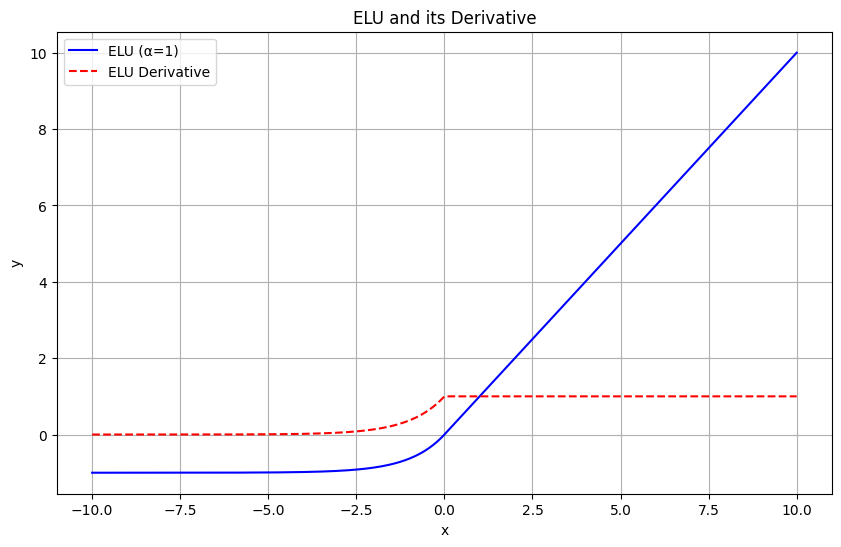

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(x_elu, y_elu, color='blue',
        label=f'ELU (α={alpha})')
plt.plot(x_elu, y_delu, color='red',
        linestyle='--', label='ELU Derivative')
plt.title('ELU and its Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()